<a href="https://colab.research.google.com/github/neetathune/EDA/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/content/AirPassengers.csv')

In [5]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


convert the month column into date time object
this will allow it to be Prgarmitacally pull time values like year or month for each recorf

In [7]:
df['Month']=pd.to_datetime(df['Month'],format="%Y-%m")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
# make the month colum index of the data frame

In [13]:
df.index=df['Month']
del df['Month']
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

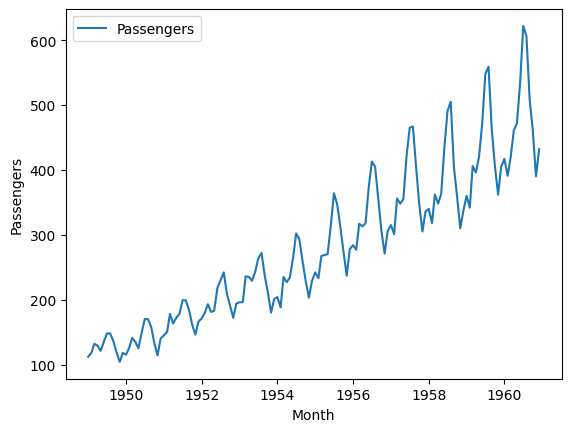

In [14]:
sns.lineplot(df)
plt.ylabel('Passengers')
plt.show

In [ ]:
# check for stationarity Let's compute a rolling  mean for the period

In [16]:
rolling_mean=df.rolling(7).mean()
rolling_std=df.rolling(7).std()

plot the original time series

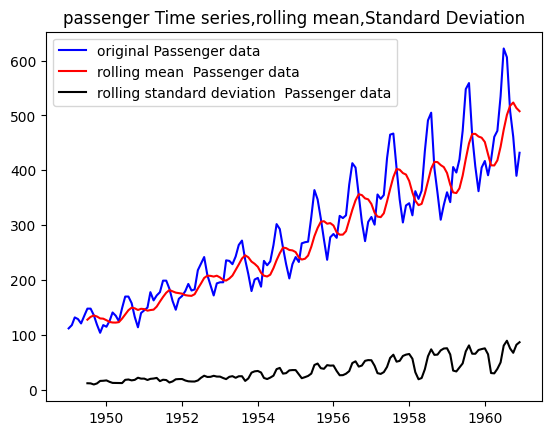

In [19]:
plt.plot(df,color='blue',label="original Passenger data")
plt.plot(rolling_mean,color='red',label="rolling mean  Passenger data")
plt.plot(rolling_std,color='black',label="rolling standard deviation  Passenger data")
plt.title("passenger Time series,rolling mean,Standard Deviation")
plt.legend()

In [ ]:
## check for stationarity with adf test

In [21]:
from statsmodels.tsa.stattools import adfuller
adft=adfuller(df,autolag='AIC')
print(adft[0])
print(adft[1])

0.8153688792060498
0.991880243437641


High P value  is a strong evedence i favour of the fact that the time series os non stationary

In [ ]:
# autocorrelation

In [25]:
autocorrelation_lag1=df['Passengers'].autocorr(lag=3)

In [26]:
autocorrelation_lag1=df['Passengers'].autocorr(lag=6)

In [24]:
print("three month lag:",autocorrelation_lag1)

three month lag: 0.9601946480498523


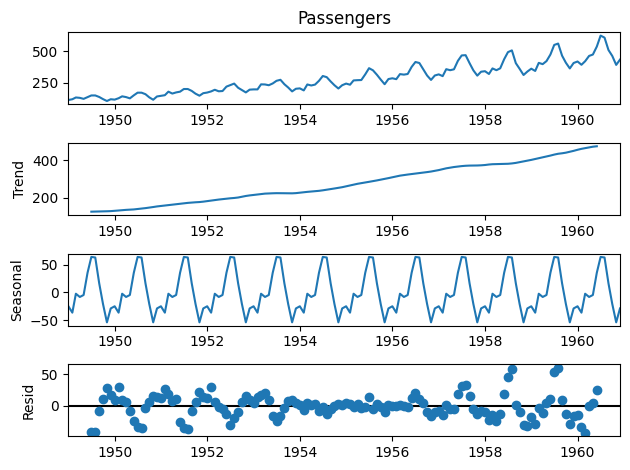

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(df['Passengers'])
decompose.plot()
plt.show()

forcasting

In [30]:
df['Date']=df.index
train=df[df['Date']<pd.to_datetime("1960-08",format='%Y-%m')]
train['train']=train['Passengers']
del train['Date']
del train['Passengers']
train

,train
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [31]:
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['Passengers']
del test['Passengers']
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432
